In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [2]:
X=np.array([4,5,5.6,6.8,7,7.2,8,0.8,1.0,1.2,2.5,2.6,3.0,4.3])
X=X.reshape(14,1)

In [3]:
t= np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
t=t.reshape(14,1)

In [4]:
## Standardize X for mean 0, variance 1, scatter plot of data and targets

In [5]:
X= StandardScaler(0,1).fit_transform(X)

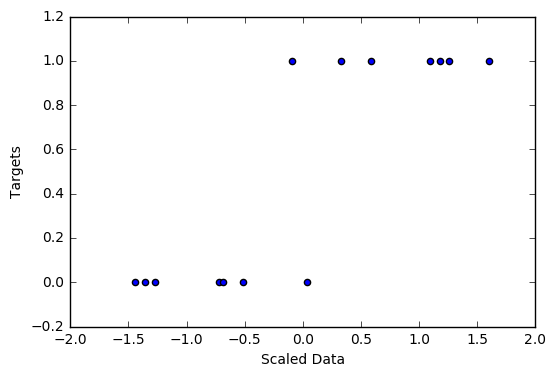

In [6]:
plt.scatter(X,t)
plt.ylabel("Targets")
plt.xlabel("Scaled Data")

plt.show()


# b) Ridge regression lambda=0.1

In [7]:
ridge = linear_model.Ridge(alpha=0.1).fit(X, t)

In [8]:
predict_ridge=ridge.predict(X)

# Logistic Regression

In [9]:
#We use np.ravel to flatten t

logreg=linear_model.LogisticRegression(penalty='l2',C=10).fit(X,t.ravel())

In [10]:
proba=logreg.predict_proba(X)

In [13]:
predict_log=logreg.predict(X)

rw0=ridge.coef_
rw1=ridge.intercept_
lw0=logreg.coef_
lw1=logreg.intercept_

In [12]:
print('Ridge regression coefficient (Part B): {0}'.format(ridge.coef_))
print('Ridge regression intercept (Part B): {0}'.format(ridge.intercept_))
print('Logistic regression coefficient (Part B): {0}'.format(logreg.coef_))
print('Logistic regression intercept (Part B): {0}'.format(logreg.intercept_))

Ridge regression coefficient (Part B): [[ 0.42263874]]
Ridge regression intercept (Part B): [ 0.5]
Logistic regression coefficient (Part B): [[ 3.52928384]]
Logistic regression intercept (Part B): [ 0.104634]


In [19]:
yr=rw0*X+rw1
yl=lw0*X+lw1

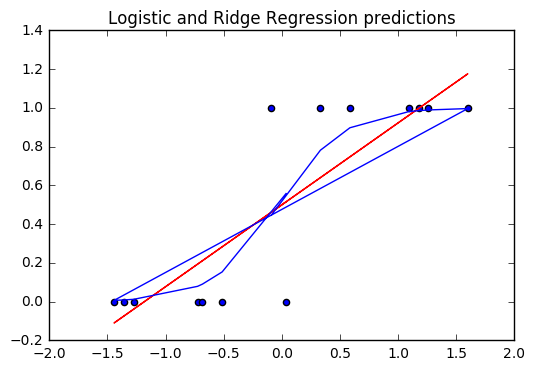

In [27]:
plt.scatter(X,t)
plt.plot(X,yr,c='red')
def model(X):
    return 1 / (1 + np.exp(-X))
loss = model(X * logreg.coef_ + logreg.intercept_)
plt.plot(X,loss,c='blue')

#plt.scatter(X,predict_log,c='yellow')
plt.title('Logistic and Ridge Regression predictions')

plt.show()

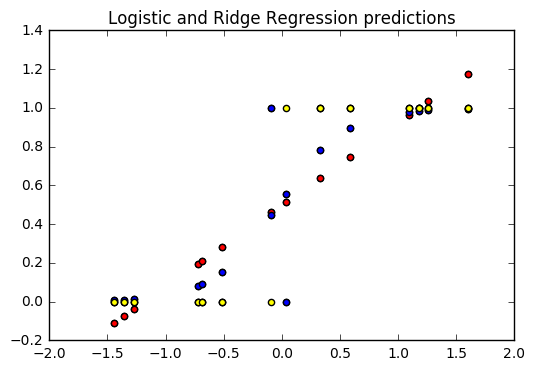

In [15]:
plt.scatter(X,t)
plt.scatter(X,predict_ridge,c='red')
plt.scatter(X,proba[:,1],c='blue')
plt.scatter(X,predict_log,c='yellow')
plt.title('Logistic and Ridge Regression predictions')
#def model(X):
#    return 1 / (1 + np.exp(-X))
#loss = model(X * logreg.coef_ + logreg.intercept_)

#plt.plot(X, loss,color='blue')
plt.show()

# C

#adding (x15,t15) =(12,1) to dataset and redoing a,b

In [16]:
X=np.array([4,5,5.6,6.8,7,7.2,8,0.8,1.0,1.2,2.5,2.6,3.0,4.3,12])
X=X.reshape(15,1)

In [17]:
t= np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,1])
t=t.reshape(15,1)

In [18]:
X= StandardScaler(0,1).fit_transform(X)

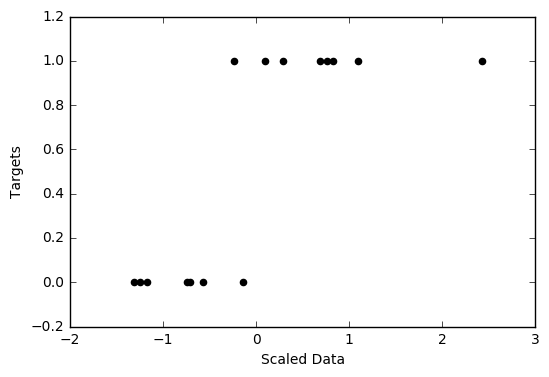

In [19]:
plt.scatter(X,t,c='black')
plt.ylabel("Targets")
plt.xlabel("Scaled Data")
plt.show()

In [28]:
ridge = linear_model.Ridge(alpha=0.1).fit(X, t.ravel())
predict_ridge=ridge.predict(X)

In [29]:
logreg=linear_model.LogisticRegression(penalty='l2',C=10).fit(X,t.ravel())
predict_log=logreg.predict(X)
predlog=logreg.predict_proba(X)

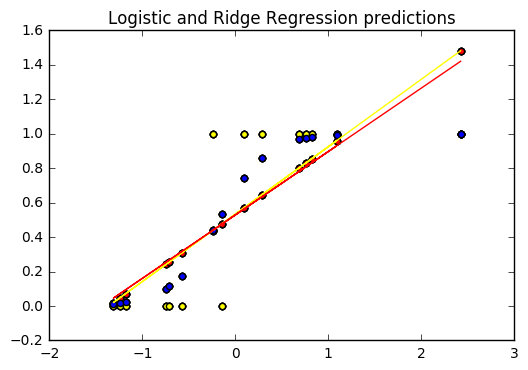

In [31]:
plt.scatter(X,t,c='yellow')
plt.scatter(X,predict_ridge,c='red')
plt.scatter(X,predlog[:,1],c='blue')
poly=np.poly1d(np.polyfit(X[:,0],predict_ridge,1))
plt.plot(X[:,0],poly(X),'-',c='yellow')

poly=np.poly1d(np.polyfit(X[:,0],predlog[:,1],1))
plt.plot(X[:,0],poly(X),'-',c='red')

plt.title('Logistic and Ridge Regression predictions')
plt.show()

# Sensitivity Analysis

In [36]:
ridge_cfm=confusion_matrix(t,[np.rint(p) for p in predict_ridge])
ridge_accuracy=(ridge_cfm[0][0]+ridge_cfm[1][1])/15

print('Ridge Accuracy',ridge_accuracy)

Ridge Accuracy 0.933333333333


In [37]:
logreg_cfm=confusion_matrix(t,predict_log)
logreg_accuracy=(logreg_cfm[0][0]+logreg_cfm[1][1])/15

print('Logistic Accuracy',logreg_accuracy)

Logistic Accuracy 0.866666666667


# Q3

In [38]:
from mnist import MNIST
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder

In [39]:
def load_dataset():
    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0

    X_train = np.asarray(X_train).reshape(60000, 784)
    labels_train = np.asarray(labels_train).reshape(60000, 1)
    X_test = np.asarray(X_test).reshape(10000, 784)
    labels_test = np.asarray(labels_test).reshape(10000, 1)

    return X_train, labels_train, X_test, labels_test


In [ ]:
if __name__ == "__main__":

    #==== Read data ====

    X_train, labels_train, X_test, labels_test = load_dataset()

    #==== Standardize data ====

    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    #==== Train ====

    mlr = linear_model.LogisticRegressionCV(Cs=np.arange(0.1, 1, 0.1))
    mlr.fit(X_train, labels_train.ravel())

In [ ]:
print('Selected hyper-parameter: {0}'.format(mlr.C_))
pred_labels_train = logreg.predict(X_train)
pred_labels_test = logreg.predict(X_test)

In [ ]:
#Accuracy 

print("Train accuracy:",metrics.accuracy_score(labels_train, pred_labels_train))
print("Test accuracy:",metrics.accuracy_score(labels_test, pred_labels_test))
